In [66]:
get_ipython().magic('env CUDA_DEVICE_ORDER=PCI_BUS_ID')
get_ipython().magic('env CUDA_VISIBLE_DEVICES=0')

env: CUDA_DEVICE_ORDER=PCI_BUS_ID
env: CUDA_VISIBLE_DEVICES=0


In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1. read availabe images 

In [2]:
img_path = '/data/put_data/timliu/kidney/pro_img/VBTEC/right_label2'
uid = []
path = []
process_list = []
for dirPath, dirName, fileList in os.walk(img_path):
    for file in fileList:
        if ('png' in file):
            if file not in process_list:
                uid.append(file.replace(".png",""))
                path.append(os.path.join(dirPath, file))
                process_list.append(file)
print(len(path))

9900


In [3]:
imgs = pd.DataFrame(columns=["uid","path","type"])
atype = ['left', 'right']
for t in atype:
    use = [i for i in range(len(path)) if(t in path[i])]
    path = np.array(path)
    uid = np.array(uid)
    tt = np.repeat(t,len(use))
    tmp = pd.DataFrame({"uid":uid[use], "path":path[use], "type":tt})
    imgs = imgs.append(tmp)

### 2. Get content date of ultrasound image

In [4]:
t = pd.read_csv("/data/put_data/cmchang/kidney/hashed_table.csv")
t.columns = t.columns.str.lower().tolist()
# rename "dirname" as "chtno" to match other table
t.rename(columns = {"dirname" : "chtno"}, inplace = True)

# generate uid 
t['name'] = t['name'].apply(lambda x: x.replace(".dcm",""))
t['chtno'] = t['chtno'].astype('str')
t['uid'] = t[['chtno','name']].apply(lambda x: '_'.join(x), axis=1)

# select a subset
t = t[['uid','chtno','name','contentdate']]
# create year column
t['year'] = t.contentdate.astype('str').apply(lambda x: x[:4])
t = t[t.year != 'not '].reset_index(drop = True)
t.year = t.year.astype('int')
t.head()

/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (5,6,8,9,10,13,14,24,26,30,33,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,uid,chtno,name,contentdate,year
0,2838_I00168335163,2838,I00168335163,20140702,2014
1,2838_I00168335164,2838,I00168335164,20140702,2014
2,2838_I00168335166,2838,I00168335166,20140702,2014
3,2838_I00168335168,2838,I00168335168,20140702,2014
4,2838_I00168335170,2838,I00168335170,20140702,2014


### merged by uid

In [5]:
''' merge '''
info = pd.merge(imgs,t,how='left',on='uid')

info['chtno'] = info['chtno'].astype('str')
info['contentdate'] = info['contentdate'].astype('str')
info['uid_date'] = info[['chtno','contentdate']].apply(lambda x: '_'.join(x), axis=1)
info.head()

,path,type,uid,chtno,name,contentdate,year,uid_date
0,/data/put_data/timliu/kidney/pro_img/VBTEC/rig...,right,5377_I00068073416,5377,I00068073416,20080716,2008,5377_20080716
1,/data/put_data/timliu/kidney/pro_img/VBTEC/rig...,right,2014_I00104545140,2014,I00104545140,20120828,2012,2014_20120828
2,/data/put_data/timliu/kidney/pro_img/VBTEC/rig...,right,1062_I00014127783,1062,I00014127783,20111205,2011,1062_20111205
3,/data/put_data/timliu/kidney/pro_img/VBTEC/rig...,right,4694_I00092185205,4694,I00092185205,20120103,2012,4694_20120103
4,/data/put_data/timliu/kidney/pro_img/VBTEC/rig...,right,2207_I00050852262,2207,I00050852262,20090721,2009,2207_20090721


In [6]:
# select img in >= 2014 year
# info = info[info.year >= 2014].reset_index(drop = True)

### 3. examination results

In [7]:
d = pd.read_csv("/data/put_data/cmchang/kidney/hashed_reno_sono_all.csv")
name = list(d.columns)
name[0] = 'count'
d.columns = name
d.columns = d.columns.str.lower().tolist()
d.head()

,count,chtno,date_entry,birth_date,sex,date_end,date_dialysis,type,clin_sect,check_time,...,egfr_mdrd,sua,hb,t_chol,dm,cvd,peripheral,htn,hbv,hcv
0,1,1,2008-06-13,1941-09-04,女,2013-01-26,2013-01-26,門診,腎臟科,2012-04-02 09:11:00,...,7.649678,6.6,8.8,166.0,0,1,0,1,0,0
1,2,1,2008-06-13,1941-09-04,女,2013-01-26,2013-01-26,門診,腎臟科,2007-05-09 15:27:00,...,22.570574,NaN,NaN,241.0,1,1,0,1,0,0
2,3,1,2008-06-13,1941-09-04,女,2013-01-26,2013-01-26,門診,腎臟科,2010-07-30 13:29:00,...,15.322898,5.9,NaN,155.0,0,1,0,1,0,0
3,4,1,2008-06-13,1941-09-04,女,2013-01-26,2013-01-26,門診,腎臟科,2011-07-29 13:40:00,...,12.835000,NaN,NaN,NaN,0,1,0,1,0,0
4,5,1,2008-06-13,1941-09-04,女,2013-01-26,2013-01-26,門診,泌尿科部,2006-09-26 17:09:00,...,23.806730,NaN,NaN,NaN,0,1,0,1,0,0


In [8]:
import datetime
from datetime import date
def calculate_age(born, entry):
    born = datetime.datetime.strptime(born, "%Y-%m-%d").date()
    entry = datetime.datetime.strptime(entry, "%Y-%m-%d").date()
    return entry.year - born.year - ((entry.month, entry.day) < (born.month, born.day))

In [9]:
d['age'] = 0
for index, row in d.iterrows():
    d.iloc[index, 25] = calculate_age(d.iloc[index, 3], d.iloc[index, 2])
    if row.sex == '女':
        d.iloc[index, 4] = 1
    else:
        d.iloc[index, 4] = 0

In [10]:
d['contentdate'] = d['exam_date'].apply(lambda x: x.replace("-",""))
d['uid_date'] = d[['chtno','contentdate']].apply(lambda x: '_'.join(x), axis=1)

### merge by uid_date  

In [11]:
''' merge '''
# info = pd.merge(info,d[['uid_date','egfr_mdrd']],how='inner',on='uid_date')
# info = info.dropna(subset=["egfr_mdrd"])
info = pd.merge(info,d[['uid_date','scr', 'egfr_mdrd', 'dm', 'cvd', 'htn', 'sex', 'age']],how='inner',on='uid_date')
info = info.dropna(subset=["scr"])
info = info.drop_duplicates().reset_index(drop = True)
print(info.shape)

(9900, 15)


In [12]:
info.head(20)

,path,type,uid,chtno,name,contentdate,year,uid_date,scr,egfr_mdrd,dm,cvd,htn,sex,age
0,/data/put_data/timliu/kidney/pro_img/VBTEC/rig...,right,5377_I00068073416,5377,I00068073416,20080716,2008,5377_20080716,3.80,19.564004,0,0,0,0,33
1,/data/put_data/timliu/kidney/pro_img/VBTEC/rig...,right,5377_I00068073364,5377,I00068073364,20080716,2008,5377_20080716,3.80,19.564004,0,0,0,0,33
2,/data/put_data/timliu/kidney/pro_img/VBTEC/rig...,right,2014_I00104545140,2014,I00104545140,20120828,2012,2014_20120828,1.24,48.701118,0,1,1,1,45
3,/data/put_data/timliu/kidney/pro_img/VBTEC/rig...,right,2014_I00104545135,2014,I00104545135,20120828,2012,2014_20120828,1.24,48.701118,0,1,1,1,45
4,/data/put_data/timliu/kidney/pro_img/VBTEC/rig...,right,2014_I00104545139,2014,I00104545139,20120828,2012,2014_20120828,1.24,48.701118,0,1,1,1,45
5,/data/put_data/timliu/kidney/pro_img/VBTEC/rig...,right,2014_I00104545134,2014,I00104545134,20120828,2012,2014_20120828,1.24,48.701118,0,1,1,1,45
6,/data/put_data/timliu/kidney/pro_img/VBTEC/rig...,right,1062_I00014127783,1062,I00014127783,20111205,2011,1062_20111205,2.71,17.827489,0,0,0,1,82
7,/data/put_data/timliu/kidney/pro_img/VBTEC/rig...,right,1062_I00014127786,1062,I00014127786,20111205,2011,1062_20111205,2.71,17.827489,0,0,0,1,82
8,/data/put_data/timliu/kidney/pro_img/VBTEC/rig...,right,1062_I00014127789,1062,I00014127789,20111205,2011,1062_20111205,2.71,17.827489,0,0,0,1,82
9,/data/put_data/timliu/kidney/pro_img/VBTEC/rig...,right,1062_I00014127788,1062,I00014127788,20111205,2011,1062_20111205,2.71,17.827489,0,0,0,1,82


In [35]:
%matplotlib inline
from matplotlib.pyplot import imshow
from scipy.misc import imread

In [117]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))

In [134]:
new_img_path = os.path.dirname(img_path)+"/clahe_"+os.path.basename(img_path)

In [137]:
import cv2
for k in range(info.shape[0]):
    img = cv2.imread(info['path'][k],0)
    equ = clahe.apply(img)
    cv2.imwrite(new_img_path+'/'+os.path.basename(info['path'][k]),equ)
    print(k, end='\r')

In [138]:
mapp = pd.read_csv('/data/put_data/timliu/kidney/mapping.csv', index_col = False)
dis = pd.read_csv('/data/put_data/timliu/kidney/reno_sono_disease1.csv', index_col = False)
mapp.rename(columns = {"ID" : "chtno"}, inplace = True)

dis = pd.merge(dis, mapp, how = 'left', on = 'chtno')
dis = dis.dropna(subset = ['code'])
dis[['code']] = dis[['code']].astype('int')
print(dis.shape)

(729, 5)


In [139]:
# patient without disease
info = pd.DataFrame([row for index, row in info.iterrows() if row['chtno'] not in list(set(dis['code']))])
print(info.shape)
info[:5]

(9900, 15)


,path,type,uid,chtno,name,contentdate,year,uid_date,scr,egfr_mdrd,dm,cvd,htn,sex,age
0,/data/put_data/timliu/kidney/pro_img/VBTEC/rig...,right,5377_I00068073416,5377,I00068073416,20080716,2008,5377_20080716,3.80,19.564004,0,0,0,0,33
1,/data/put_data/timliu/kidney/pro_img/VBTEC/rig...,right,5377_I00068073364,5377,I00068073364,20080716,2008,5377_20080716,3.80,19.564004,0,0,0,0,33
2,/data/put_data/timliu/kidney/pro_img/VBTEC/rig...,right,2014_I00104545140,2014,I00104545140,20120828,2012,2014_20120828,1.24,48.701118,0,1,1,1,45
3,/data/put_data/timliu/kidney/pro_img/VBTEC/rig...,right,2014_I00104545135,2014,I00104545135,20120828,2012,2014_20120828,1.24,48.701118,0,1,1,1,45
4,/data/put_data/timliu/kidney/pro_img/VBTEC/rig...,right,2014_I00104545139,2014,I00104545139,20120828,2012,2014_20120828,1.24,48.701118,0,1,1,1,45


In [145]:
info['path'] = info['path'].apply(lambda name: name.replace(img_path, new_img_path))

In [147]:
info.to_csv(new_img_path+'/df_with_labels.csv', index=False)

## == The end of main program ==

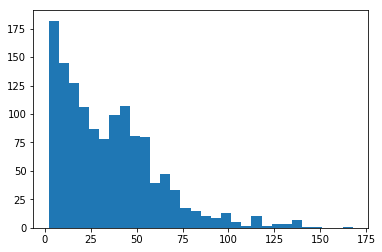

In [59]:
d = pd.read_csv('left_0105.csv')
plt.hist(d.egfr_mdrd, bins=30)
plt.show()
plt.close()

In [33]:
d = pd.read_csv('left_check.csv')
d.head()

,path,type,uid,chtno,name,contentdate,uid_date,scr,egfr_mdrd,dm,cvd,htn,sex,age
0,/data/put_data/timliu/kidney/check_0105/left/5...,left,5726_I00183308768,5726,I00183308768,20141208,5726_20141208,5.25,11.131283,1,1,1,0,85
1,/data/put_data/timliu/kidney/check_0105/left/5...,left,5726_I00183308828,5726,I00183308828,20141208,5726_20141208,5.25,11.131283,1,1,1,0,85
2,/data/put_data/timliu/kidney/check_0105/left/5...,left,5726_I00183308857,5726,I00183308857,20141208,5726_20141208,5.25,11.131283,1,1,1,0,85
3,/data/put_data/timliu/kidney/check_0105/left/5...,left,5726_I00183308786,5726,I00183308786,20141208,5726_20141208,5.25,11.131283,1,1,1,0,85
4,/data/put_data/timliu/kidney/check_0105/left/5...,left,5726_I00183308791,5726,I00183308791,20141208,5726_20141208,5.25,11.131283,1,1,1,0,85


In [ ]:
for path in info2.path:
    os.system('cp {} {}'.format(path, '/data/put_data/timliu/kidney/result_0105/right/'))

In [87]:
df = pd.read_csv('GE_final.csv', index_col = False)
df2 = pd.read_csv('INFINITT_final.csv', index_col = False)
df3 = pd.read_csv('VBTEC_final.csv', index_col = False)
df4 = pd.concat((df, df2, df3), axis = 0)
df4 = df4.reset_index(drop = True)
print(df4.shape)
df4.to_csv('meta.csv')
df4.head()

(11540, 14)


,path,type,uid,chtno,name,contentdate,uid_date,scr,egfr_mdrd,dm,cvd,htn,sex,age
0,/data/put_data/timliu/kidney/pro_img/GE_CH_noC...,left,615_I00222595439,615,I00222595439,20151130,615_20151130,1.57,34.063181,1,1,1,1,75
1,/data/put_data/timliu/kidney/pro_img/GE_CH_noC...,left,6305_I00181899559,6305,I00181899559,20141124,6305_20141124,2.54,21.169645,0,0,0,1,48
2,/data/put_data/timliu/kidney/pro_img/GE_CH_noC...,right,6305_I00181899150,6305,I00181899150,20141124,6305_20141124,2.54,21.169645,0,0,0,1,48
3,/data/put_data/timliu/kidney/pro_img/GE_CH_noC...,right,6305_I00181898231,6305,I00181898231,20141124,6305_20141124,2.54,21.169645,0,0,0,1,48
4,/data/put_data/timliu/kidney/pro_img/GE_CH_noC...,left,734_I00164259518,734,I00164259518,20140519,734_20140519,1.48,36.261299,1,1,1,1,75


In [182]:
df = pd.read_csv('/data/put_data/timliu/kidney/201611291011_Exam.csv', index_col=False)
df2 = df[df[' 檢查類別'] == '內科部腹部超音波檢查']

In [183]:
# 內科部腹部超音波檢查 內科部腎臟超音波檢查
# list(set(df[' 檢查類別']))

In [184]:
df2.rename(columns={'檢查單號': 'chtno'}, inplace=True)

/usr/local/lib/python3.5/dist-packages/pandas/core/frame.py:2746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


In [189]:
test = list(set(df.檢查單號.values))
count = 0
for chtno in mapp.chtno.values:
    if chtno in test:
        count += 1
        print(chtno)
print(count)

28809
39234
76292
92298
154891
161009
190951
193707
198827
321947
393807
430789
471459
565241
627859
692095
697736
714292
736083
752730
755015
791704
793568
819901
846239
855701
880362
955271
956673
982672
986675
10083500
10086855
10088746
10167775
10254967
10311345
10510014
10539181
10960848
11197288
11493422
11783429
12479801
12702226
12806439
12816281
13010722
13262710
13984074
14043868
14511781
14516569
15154826
15337273
15578777
15582158
15922814
16772010
16819641
17187876
17525887
17657524
17775762
17893431
18378703
18554134
18598881
18599221
19295844
19662927
19871351
20482113
20604113
21664336
21853975
21881409
22456867
22471676
22471794
22474792
22700795
22777563
22795801
22821542
22834847
23381741
23537139
23921832
23928803
23942758
23978020
23979064
23994019
24004946
24014854
24016318
24018452
24023971
24039927
24051238
24084311
24085522
24090718
24093525
24111732
24122080
24157745
24169464
24171145
24188913
24191787
24200044
24201120
24203757
24218561
24219029
24229524
2423

In [188]:
print(mapp.shape)
print(len(list(set(df.檢查單號.values))))

(8281, 2)
570659


In [17]:
df = pd.read_csv('right_0123.csv')
df2 = pd.read_csv('length_0123.csv')
df3 = pd.merge(df, df2, how = 'left', on = 'path')
df3.rename(columns = {"0" : "length"}, inplace = True)
df3.to_csv('merged_0123.csv')
print(df.shape, df2.shape, df3.shape)

(1537, 14) (1774, 2) (1537, 15)


In [19]:
d = pd.read_csv('merged_0105.csv')
d2 = pd.read_csv('merged_0123.csv')

In [25]:
d3 = d.append(d2)
d3 = d3.reset_index(drop=True)
d3.to_csv('all_merged.csv', index=False)

In [1212]:
df = pd.read_csv('left_0105.csv')
df2 = pd.read_csv('length_0105.csv')
df3 = pd.merge(df, df2, how = 'left', on = 'path')
df3.rename(columns = {"0" : "length"}, inplace = True)
df4 = df3[(df3['length'] != 'Suspension') & (df3.dm == 0)] # & (df3.dm == 0)
df4 = df4.reset_index(drop = True)
print(df4.shape)
df4.head()
df4.length = df4.length.astype('float')

(712, 15)


In [1213]:
df4 = df4[((df4.egfr_mdrd >= 15) & (df4.length <= 10)) | ((df4.egfr_mdrd <= 90) & (df4.length >= 8))]
df4 = df4.reset_index(drop = True)
print(df4.shape)

(646, 15)


In [1214]:
import xgboost as xgb
from pandas import Series

In [1215]:
# # # splitting data
# import random
# ratio = 0.8
# unique_id = list(set(df4['uid_date']))
# random.shuffle(unique_id)
# train_id = unique_id[:int(ratio*len(unique_id))]
# test_id = unique_id[int(ratio*len(unique_id)):]
# print(len(train_id))
# print(len(test_id))

In [1256]:
# split data every-step = 10 
ratio = 0.8
random.seed(45) #78
train_id = []
test_id = []
for i in range(0, 34):
    df_sub = df4[df4['egfr_mdrd'].between(5*i, 5*(i+1), inclusive = (True, False))]
    d_list = Series.tolist(df_sub['uid_date'])
    d_list = list(set(d_list))
    random.shuffle(d_list)
    train_id += d_list[:int(ratio*len(d_list))]
    test_id += d_list[int(ratio*len(d_list)):]
print(len(train_id))
print(len(test_id))

334
98


In [1257]:
train_df = pd.DataFrame([row for index, row in df4.iterrows() if row.uid_date in train_id])
train_df=train_df.reset_index(drop = True)
test_df = pd.DataFrame([row for index, row in df4.iterrows() if row.uid_date in test_id])
test_df=test_df.reset_index(drop = True)

In [1267]:
test_df.shape

(142, 15)

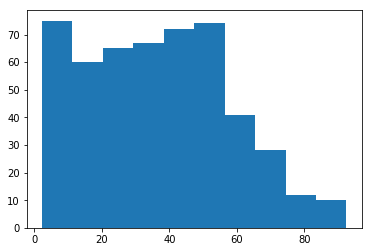

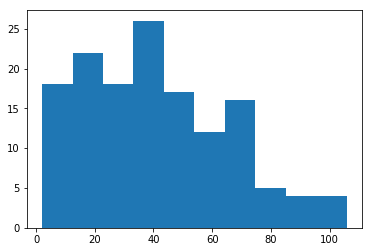

In [1258]:
plt.hist(train_df.egfr_mdrd)
plt.show()
plt.close()
plt.hist(test_df.egfr_mdrd)
plt.show()
plt.close()

In [1259]:
# ggg = df4[(df4.egfr_mdrd >= 15) & (df4.length >= 10) & (df4.dm == 0)]
# for path in ggg.path.values:
#     os.system('cp {} {}'.format(path, '/data/put_data/timliu/kidney/ggg/'))

In [1260]:
dtrain = xgb.DMatrix(train_df.iloc[:, -5:].values, label=train_df.egfr_mdrd.values)
dtest = xgb.DMatrix(test_df.iloc[:, -5:].values, label=test_df.egfr_mdrd.values)

In [1261]:
param = {'max_depth': 3, 'eta': 0.1, 'silent': 0, 'objective': 'reg:linear', 'subsample': 0.1, 'alpha': 1e-4}
param['nthread'] = 4
param['eval_metric'] = 'mae'

In [1262]:
evallist = [(dtrain, 'train'), (dtest, 'eval')]

In [1263]:
num_round = 2000
bst = xgb.train(param, dtrain, num_round, evallist,early_stopping_rounds=100)

[0]	train-mae:33.0366	eval-mae:37.3973
Multiple eval metrics have been passed: 'eval-mae' will be used for early stopping.

Will train until eval-mae hasn't improved in 100 rounds.
[1]	train-mae:29.9417	eval-mae:34.1795
[2]	train-mae:27.8597	eval-mae:32.0467
[3]	train-mae:25.9095	eval-mae:29.9878
[4]	train-mae:24.6706	eval-mae:28.7099
[5]	train-mae:23.772	eval-mae:27.6617
[6]	train-mae:22.5363	eval-mae:26.5606
[7]	train-mae:21.4697	eval-mae:25.3968
[8]	train-mae:20.6724	eval-mae:24.4806
[9]	train-mae:20.0391	eval-mae:23.9477
[10]	train-mae:19.7255	eval-mae:23.5336
[11]	train-mae:18.9902	eval-mae:22.7385
[12]	train-mae:18.6815	eval-mae:22.207
[13]	train-mae:18.2687	eval-mae:21.7221
[14]	train-mae:17.8332	eval-mae:21.1857
[15]	train-mae:17.448	eval-mae:20.9076
[16]	train-mae:17.2039	eval-mae:20.6085
[17]	train-mae:16.9427	eval-mae:20.4435
[18]	train-mae:16.6594	eval-mae:19.9655
[19]	train-mae:16.6855	eval-mae:19.8045
[20]	train-mae:16.459	eval-mae:19.6922
[21]	train-mae:16.2452	eval-mae:

In [1264]:
ypred = bst.predict(dtest, ntree_limit=bst.best_ntree_limit)

In [1265]:
def plot_making(true, pred, types):
    cor = pearsonr(true, pred)[0]
    mae = mean_absolute_error(true, pred)
    r2 = r2_score(true, pred) 
    plt.figure(0)
    plt.scatter(true, pred, alpha = .15, s = 20)
    plt.xlabel('True_Y')
    plt.ylabel('Pred_Y')
    plt.title(" data \n" + "MAE = %4f; Cor = %4f; R2 = %4f; #samples = %d" % (mae, cor, r2, len(true)))
    plt.savefig(types + "_plot_scatter.png" , dpi = 200)
    plt.show()
    plt.close()

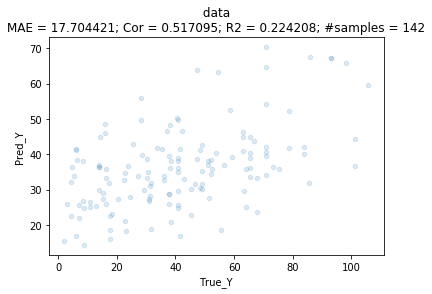

In [1266]:
from scipy.stats.stats import pearsonr
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_absolute_error, r2_score
plot_making(test_df.iloc[:, -7].values, ypred, types = 'test')